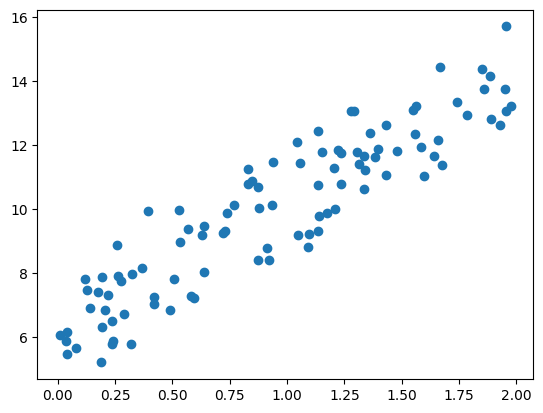

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)
plt.scatter(X,y)

In [8]:
def get_cost(y,y_pred):
  N=len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost


In [3]:
def get_weight_updates(w1,  w0, X, y, learning_rate=0.01):
  N = len(X)
  w1_update = np.zeros_like(w1.shape)
  w0_update = np.zeros_like(w0.shape)
  y_pred = np.dot(X, w1) + w0
  diff =y-y_pred

  w0_factors = np.ones((N,1))
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
  return w1_update, w0_update

In [4]:
def gradient_descent_steps(X, y, iters=10000):
#    w0와    w1 을    모두    0으로    초기화.
  w0 = np.zeros((1,  1))
  w1  = np.zeros((1, 1))
#    인자로    주어진     iters 만큼    반복적으로    get_weight_updates() 호출해    w1,  w0  업데이트    수행.
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X, y, learning_rate=0.01)
    w1  = w1   - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [11]:
def get_cost(y, y_pred):
  N  = len(y)
  cost = np.sum(np.square(y - y_pred))/N
  return cost

w1,w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1 [0,  0], w0[0,  0]))
y_pred = w1 [0,  0]  * X + w0
print('Gradient Descent Total Cost：{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost：0.9935


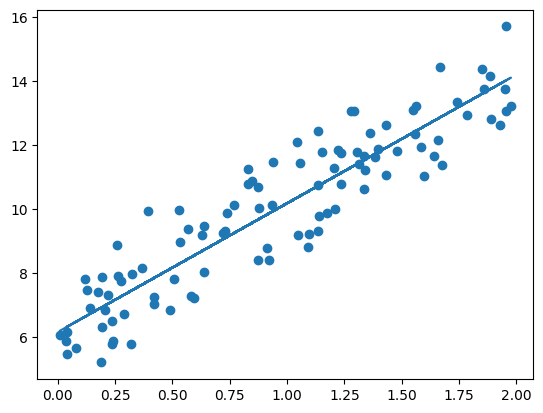

In [12]:
plt.scatter(X,y)
plt.plot(X,y_pred)


In [13]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1, 1))
  w1 = np.zeros((1, 1))
  for ind in range(iters):
    np.random.seed(ind)
    stochastic_random_index = np.random.permutation(len(X))
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  return w1, w0

In [15]:
w1,w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,  0], 3),  "w0:",  round(w0[0,  0], 3))
y_pred = w1 [0,  0]  * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


In [17]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

bostonDF = pd.DataFrame(data, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
bostonDF['PRICE'] = target

print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1690580559.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


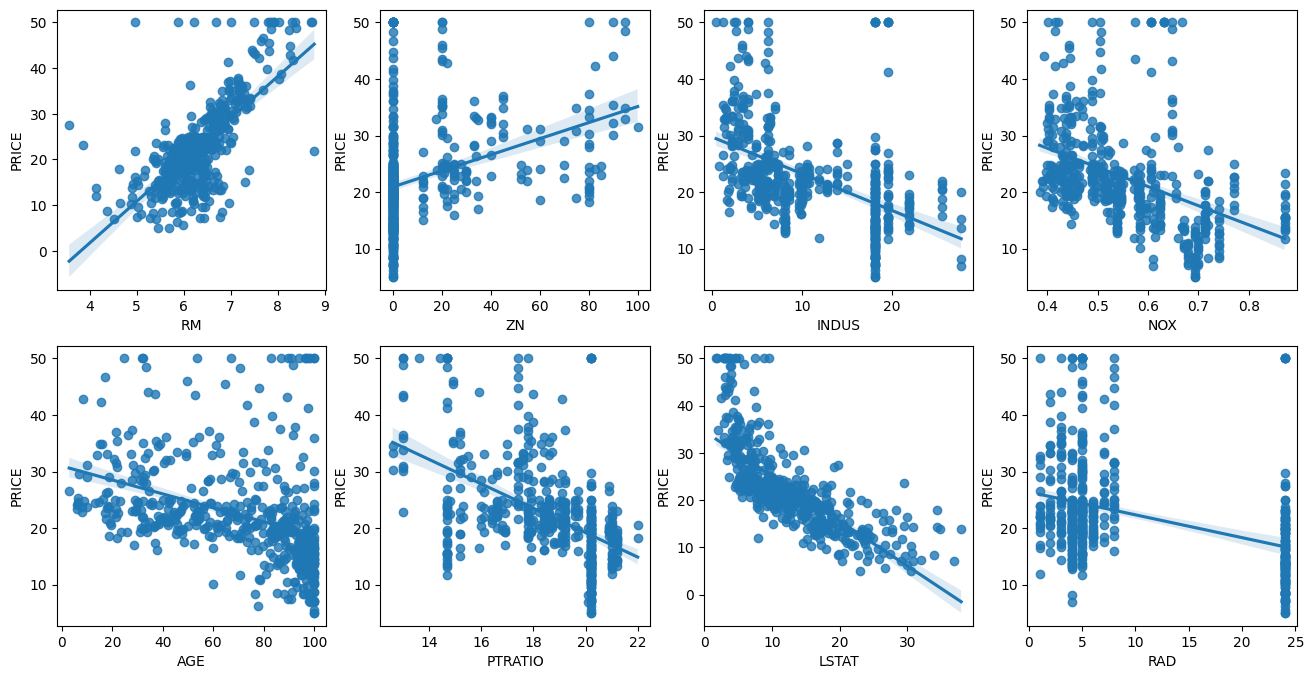

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(figsize = (16,8),ncols = 4,nrows=2)
lm_features = ['RM',  'ZN',    'INDUS',  'NOX',  'AGE',  'PTRATIO',  'LSTAT',  'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
#   시본의     regplot을    이용해     산점도와   선형     회귀     직선을    함께     표현
  sns.regplot(x=feature, y='PRICE',  data=bostonDF, ax=axs[row][col])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],  axis=1,  inplace=False)
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_target, test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3F}'.format(mse, rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE:17.297, RMSE:4.159
Variance score: 0.757


In [21]:
print('절편    값:', lr.intercept_)
print('회귀     계수값:', np.round(lr.coef_, 1))

절편    값: 40.995595172164826
회귀     계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [24]:
coeff = pd.Series(data=np.round(lr.coef_,   1),   index=X_data.columns )
coeff.sort_values(ascending = False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


In [26]:
from sklearn.model_selection import cross_val_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1,  inplace=False)
Ir = LinearRegression()
#   cross_val_score( )로    5  폴드    세트로    MSE  를    구한    뒤      이를     기반으로    다시     RMSE  구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target,   scoring="neg_mean_squared_error", cv = 5)
rmse_scores   = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
#   cross_val_score(scoring="neg_mean_squared_error")로     반환된     값은    모두    음수
print('5 folds 의      개별     Negative MSE  scores：',np.round(neg_mse_scores,  2))
print('5 folds 의     개별     RMSE  scores  :',   np.round(rmse_scores,  2))
print('5  folds 의      평균    RMSE  :{0:.3f} '.format(avg_rmse))

5 folds 의      개별     Negative MSE  scores： [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의     개별     RMSE  scores  : [3.53 5.1  5.75 8.99 5.77]
5  folds 의      평균    RMSE  :5.829 


In [27]:
from sklearn.preprocessing import PolynomialFeatures
import numpy  as np
#   다항식으로    변환한    단항식     생성,  [[0,  1],  [2,  3]]의     2X2 행렬     생성
X = np.arange(4).reshape(2, 2)
print('일차   단항식     계수    피처:\n',  X  )
#   degree = 2인     2차    다항식으로    변환하기     위해    PolynomialFeatures를     이용해     변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된     2차    다항식     계수    피처:\n',  poly_ftr)

일차   단항식     계수    피처:
 [[0 1]
 [2 3]]
변환된     2차    다항식     계수    피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [30]:
def polynomial_func(X):
  y = 1    + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y
X = np.arange(4).reshape(2,2)
print('일차     단항식     계수    feature：          \n'   ,X)
y = polynomial_func(X)
print('삼차    다항식     결정값: \n',  y)

일차     단항식     계수    feature：          
 [[0 1]
 [2 3]]
삼차    다항식     결정값: 
 [  5 125]


In [33]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차    다항식     계수    feature：\n',poly_ftr)
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀     계수\n'   ,  np. round (model.coef_, 2))
print('Polynomial 회귀     Shape  ：', model.coef_.shape)

3차    다항식     계수    feature：
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀     계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀     Shape  ： (10,)


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy  as np
def polynomial_func(X):
  y = 1    + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y
#   Pipeline 객체로    Streamline하게    Polynomial Feature 변환과    Linear Regression을    연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X, y)
print( 'Polynomial 회귀     계수\n',  np. round (model. named_steps[ 'linear' ]  .coef_, 2))

Polynomial 회귀     계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [35]:
import numpy  as np
import matplotlib.pyplot as pit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
#   임의의     값으로    구성된    X값에     대해    코사인     변환    값을    반환.
def true_fun(X):
  return np.cos(1.5 * np.pi * X)
#   수는     0부터     1 까지     30개의      임의의     값을    순서대로    샘플링한    데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
#   y 값은    코사인     기반의     tr나e_fun()에서     약간의     노이즈    변동    값을    더한    값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀     계수는    [-1.61]  입니다.
Degree 1 MSE  는    0.4077289625098685  입니다.

Degree 4 회귀     계수는    [  0.47 -17.79  23.59  -7.26]  입니다.
Degree 4 MSE  는    0.04320874987232064  입니다.

Degree 15 회귀     계수는    [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]  입니다.
Degree 15 MSE  는    181238256.56423894  입니다.


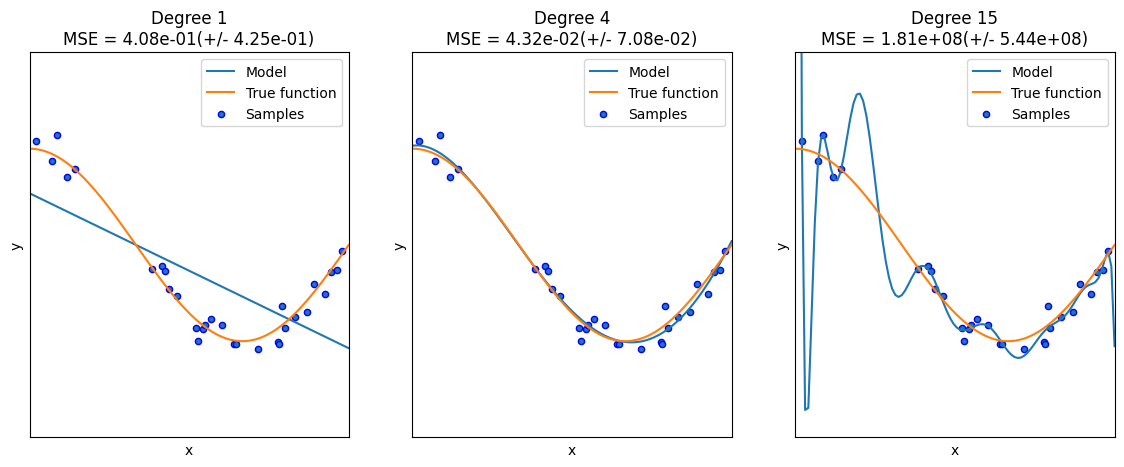

In [37]:
plt.figure(figsize=(14, 5))
degrees = [1,  4, 15]

for i in range(len(degrees)):
  ax = plt.subplot(1,  len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
  ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)
  scores = cross_val_score(pipeline, X.reshape(-1,  1), y,   scoring="neg_mean_squared_error", cv=10)
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print ('\nDegree {0} 회귀     계수는    {1}  입니다.'.format (degrees [i], np.round(coefficients, 2)))
  print ('Degree {0} MSE  는    {1}  입니다.'.format (degrees [i], -1 *np. mean (scores)))
  X_test = np.linspace(0,   1,   100)
  plt.plot(X_test, pipeline.predict(X_test[:,  np.newaxis]), label = "Model")
  plt.plot(X_test,   true_fun(X_test), '-',label="True function")
  plt.scatter(X, y, edgecolor='b', s=20,  label="Samples")
  plt.xlabel("x");     plt.ylabel("y");     plt.xlim((0, 1 ));     plt.ylim((-2,2));      plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
# alpha=10으로    설정해     릿지     회귀     수행.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,  scoring="neg_mean_squared_error",  cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('   5  folds 의      개별     Negative MSE  scores：'  ,np.round(neg_mse_scores,  3))
print(' 5  folds 의      7H별      RMSE  scores :  ', np.round(rmse_scores,  3))
print('    5  folds 의      평균    RMSE: {0:.3f}  '.format(avg_rmse))

   5  folds 의      개별     Negative MSE  scores： [-11.422 -24.294 -28.144 -74.599 -28.517]
 5  folds 의      7H별      RMSE  scores :   [3.38  4.929 5.305 8.637 5.34 ]
    5  folds 의      평균    RMSE: 5.518  


In [41]:
alphas = [0,  0.1, 1, 10,  100]
#    alphas list 값을    반복하면서    alpha에     따른    평균   rmse를   구함.
for alpha in alphas  :
  ridge = Ridge(alpha = alpha)
# cross_val_score를     이용해     5  폴드의     평균    RMSE를    계산
  neg_mse_scores = cross_val_score(ridge,  X_data,  y_target, scoring="neg_mean_squared_error",  cv = 5)
  avg_rmse = np.mean(np.sqrt(-1  * neg_mse_scores))
  print('alpha {0}  일     때     5  folds 의     평균    RMSE  :   {1:.3f}  '  .format(alpha, avg_rmse))

alpha 0  일     때     5  folds 의     평균    RMSE  :   5.829  
alpha 0.1  일     때     5  folds 의     평균    RMSE  :   5.788  
alpha 1  일     때     5  folds 의     평균    RMSE  :   5.653  
alpha 10  일     때     5  folds 의     평균    RMSE  :   5.518  
alpha 100  일     때     5  folds 의     평균    RMSE  :   5.330  


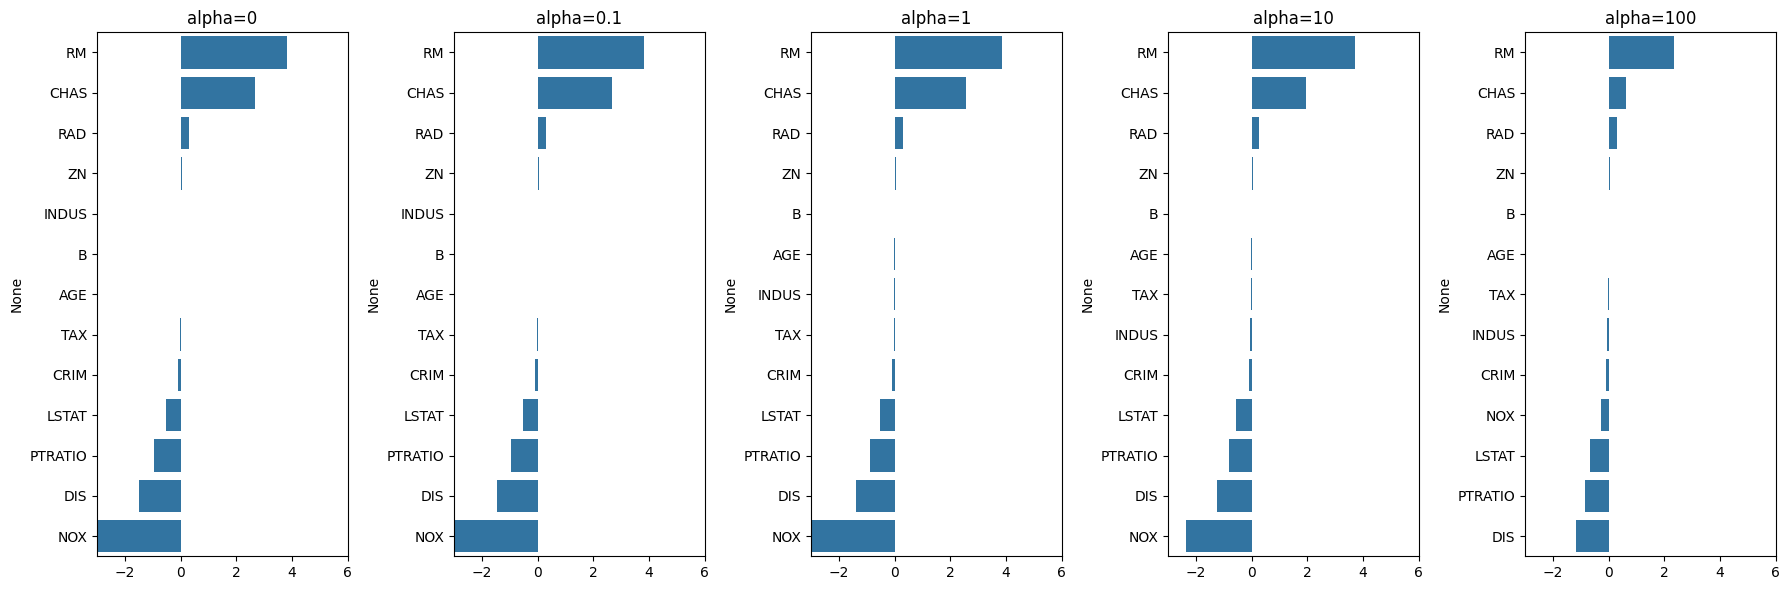

In [42]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

# 계수 값을 저장할 DataFrame
coeff_df = pd.DataFrame()

# alpha별 회귀 수행 및 시각화
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)

    # 계수를 Series로 변환해 DataFrame에 저장
    colname = 'alpha=' + str(alpha)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    coeff_df[colname] = coeff

    # 내림차순 정렬 후 시각화
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.tight_layout()
plt.show()



In [45]:
ridge_alphas = [0,  0.1, 1,  10,  100]
sort_column = 'alpha='+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,  ascending=False)

,alpha=0,alpha=0.1,alpha=1,alpha=10,alpha=100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [50]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

def get_linear_reg_eval(model_name, params=None,
                        X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    """
    model_name : 'Ridge', 'Lasso', 'ElasticNet' 중 하나
    params     : alpha 리스트
    X_data_n   : 입력 데이터
    y_target_n : 타깃 데이터
    verbose    : True면 alpha별 RMSE 출력
    return_coeff : True면 회귀계수를 DataFrame으로 반환
    """
    coeff_df = pd.DataFrame()

    if verbose:
        print(f"##### {model_name} #####")

    for param in params:
        # 모델 선택
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param, max_iter=10000)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7, max_iter=10000)
        else:
            raise ValueError("model_name은 'Ridge', 'Lasso', 'ElasticNet' 중 하나여야 합니다.")

        # 5-Fold 교차검증 RMSE 계산
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                         scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f"alpha {param}일 때 5폴드 세트의 평균 RMSE: {avg_rmse:.3f}")

        # 모델 다시 학습 (회귀계수 추출용)
        model.fit(X_data_n, y_target_n)

        # 계수 저장
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha=' + str(param)
            coeff_df[colname] = coeff

    return coeff_df

In [52]:
lasso_alphas = [   0.07, 0.1, 0.5, 1,  3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas,  X_data_n=X_data,  y_target_n=y_target)

##### Lasso #####
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.189


In [54]:
sort_column =  'alpha='+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,   ascending=False)

,alpha=0.07,alpha=0.1,alpha=0.5,alpha=1,alpha=3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [55]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1,  3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet',  params=elastic_alphas,
X_data_n=X_data,  y_target_n=y_target)

##### ElasticNet #####
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.068


In [57]:
sort_column = 'alpha='+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha=0.07,alpha=0.1,alpha=0.5,alpha=1,alpha=3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [58]:
# 데이터 스케일링/정규화 및 다항식/로그 변환 함수
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import numpy as np

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 중 선택
# p_degree는 다항식 특성 추가를 위한 값 (예: 2 이상 부여 시 적용)
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)  # log(x+1), 음수 방지용
    else:
        scaled_data = input_data

    # 다항식 특성 변환
    if p_degree is not None:
        scaled_data = PolynomialFeatures(
            degree=p_degree, include_bias=False
        ).fit_transform(scaled_data)

    return scaled_data


In [59]:
# Ridge의 alpha 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
import numpy as np
from sklearn.linear_model import Ridge

# alpha 값 리스트
alphas = [0.1, 1, 10, 100]

# 5가지 변환 방식 정의
# (원본, 표준정규, 표준정규+다항식, 최댓값/최솟값, 최댓값/최솟값+다항식, 로그)
scale_methods = [
    ('None', None),
    ('Standard', None),
    ('Standard', 2),
    ('MinMax', None),
    ('MinMax', 2),
    ('Log', None)
]

# 각 변환 방식별로 RMSE 비교
for scale_method in scale_methods:
    # 데이터 변환 수행
    X_data_scaled = get_scaled_data(
        method=scale_method[0],
        p_degree=scale_method[1],
        input_data=X_data
    )

    # 변환 방식 출력
    print('\n### 변환 유형: {}, Polynomial Degree: {} ###'.format(
        scale_method[0], scale_method[1])
    )

    # Ridge 모델 RMSE 비교 (함수는 앞서 정의한 get_linear_reg_eval 사용)
    get_linear_reg_eval(
        model_name='Ridge',
        params=alphas,
        X_data_n=X_data_scaled,
        y_target_n=y_target,
        verbose=True,
        return_coeff=False
    )



### 변환 유형: None, Polynomial Degree: None ###
##### Ridge #####
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.330

### 변환 유형: Standard, Polynomial Degree: None ###
##### Ridge #####
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.421

### 변환 유형: Standard, Polynomial Degree: 2 ###
##### Ridge #####
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5폴드 세트의 평균 RMSE: 4.634

### 변환 유형: MinMax, Polynomial Degree: None ###
##### Ridge #####
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5폴드 세트의 평균 RMSE: 7.635

### 변환 유형: MinMax, Polynomial Degree: 2 ###
##### Ridge #####
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.185
alpha

In [60]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# 유방암 데이터 로드
cancer = load_breast_cancer()

# 데이터 구조 확인
print(cancer.keys())
print("데이터 크기:", cancer.data.shape)
print("타깃 클래스:", cancer.target_names)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
데이터 크기: (569, 30)
타깃 클래스: ['malignant' 'benign']


In [61]:
# 표준화(스케일링) 및 학습/테스트 데이터 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler 적용: 평균 0, 분산 1로 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    data_scaled, cancer.target, test_size=0.3, random_state=0
)

print("훈련 세트 크기:", X_train.shape)
print("테스트 세트 크기:", X_test.shape)


훈련 세트 크기: (398, 30)
테스트 세트 크기: (171, 30)


In [62]:
# 로지스틱 회귀 모델 학습 및 평가
from sklearn.metrics import accuracy_score, roc_auc_score

# LogisticRegression 기본 solver(lbfgs) 사용
lr = LogisticRegression(max_iter=600)
lr.fit(X_train, y_train)

# 예측
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

# 평가
print("정확도(Accuracy): {:.3f}".format(accuracy_score(y_test, pred)))
print("ROC-AUC: {:.3f}".format(roc_auc_score(y_test, pred_proba)))


정확도(Accuracy): 0.977
ROC-AUC: 0.995


In [63]:
# solver 비교 실험
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']

print("\n[solver별 성능 비교]")
for solver in solvers:
    try:
        lr_solver = LogisticRegression(solver=solver, max_iter=600)
        lr_solver.fit(X_train, y_train)
        pred = lr_solver.predict(X_test)
        proba = lr_solver.predict_proba(X_test)[:, 1]
        print(f"{solver:10s} → Accuracy: {accuracy_score(y_test, pred):.3f}, ROC-AUC: {roc_auc_score(y_test, proba):.3f}")
    except Exception as e:
        print(f"{solver:10s} → 실행 불가: {e}")



[solver별 성능 비교]
liblinear  → Accuracy: 0.982, ROC-AUC: 0.995
lbfgs      → Accuracy: 0.977, ROC-AUC: 0.995
newton-cg  → Accuracy: 0.977, ROC-AUC: 0.995
sag        → Accuracy: 0.982, ROC-AUC: 0.995
saga       → Accuracy: 0.982, ROC-AUC: 0.995


In [65]:
# GridSearchCV를 이용한 LogisticRegression 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 데이터 로드 및 스케일링
cancer = load_breast_cancer()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

# 탐색할 파라미터 설정
params = {
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2', 'l1'],   # 일부 조합(lbfgs+l1)은 지원 안됨 → 경고 발생 가능
    'C': [0.01, 0.1, 1, 5, 10]
}

# 로지스틱 회귀 모델
lr_clf = LogisticRegression(max_iter=600)

# GridSearchCV 설정 (3-Fold 교차검증)
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)

# 결과 출력
print("최적 하이퍼파라미터:", grid_clf.best_params_)
print("최적 평균 정확도: {:.3f}".format(grid_clf.best_score_))


최적 하이퍼파라미터: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
최적 평균 정확도: 0.979


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [76]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 보스턴 대신 캘리포니아 주택 데이터 사용
cal = fetch_california_housing()
X_data = pd.DataFrame(cal.data, columns=cal.feature_names)
y_target = cal.target * 100000   # 단위(가격) 보정

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target,
                                 scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5-Fold Negative MSE:', np.round(neg_mse_scores, 2))
print('5-Fold RMSE:', np.round(rmse_scores, 2))
print('평균 RMSE: {:.3f}'.format(avg_rmse))


5-Fold Negative MSE: [-5.18800444e+09 -3.43999430e+09 -3.70761134e+09 -4.37475630e+09
 -4.61665302e+09]
5-Fold RMSE: [72027.8  58651.46 60890.16 66141.94 67945.96]
평균 RMSE: 65131.465


In [77]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target,
                                     scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(f"##### {model.__class__.__name__} #####")
    print("개별 RMSE:", np.round(rmse_scores, 3))
    print("평균  RMSE: {:.3f}\n".format(avg_rmse))

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0,  n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)
# 트리     기반의     회귀     모델을    반복하면서     평가   수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model  in models:
  get_model_cv_prediction(model,  X_data, y_target)

##### DecisionTreeRegressor #####
개별 RMSE: [77694.345 80953.314 80476.498 84983.032 80483.44 ]
평균  RMSE: 80918.126

##### RandomForestRegressor #####
개별 RMSE: [72027.803 58651.465 60890.158 66141.941 67945.957]
평균  RMSE: 65131.465

##### GradientBoostingRegressor #####
개별 RMSE: [59854.234 59073.113 61987.799 64867.415 67951.477]
평균  RMSE: 62746.807

##### XGBRegressor #####
개별 RMSE: [68097.715 59114.658 62173.915 72791.723 76819.426]
평균  RMSE: 67799.487

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 216493.028949
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838

<Axes: xlabel='None', ylabel='None'>

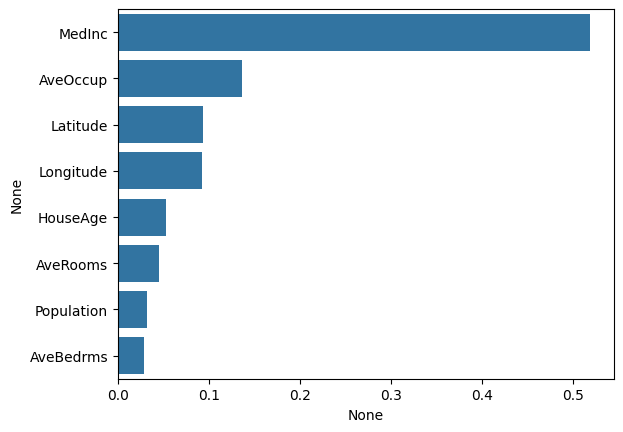

In [83]:
import seaborn as  sns
%matplotlib inline
rf_reg = RandomForestRegressor(n_estimators=1000)
# 앞    예제에서     만들어진    X.data, y_target 데이터     세트를    적용해    학습합니다.
rf_reg.fit(X_data, y_target)
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns  )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


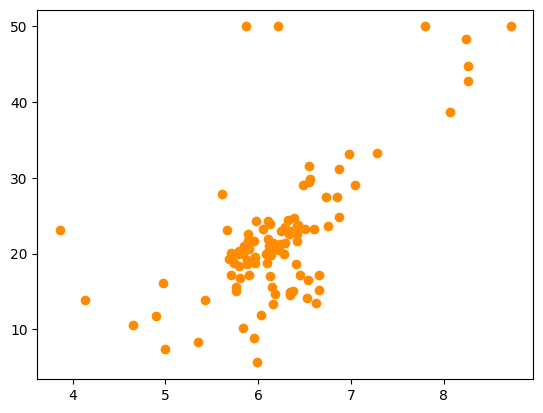

In [84]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample['RM'], bostonDF_sample.PRICE,c="darkorange")

In [87]:
import numpy  as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# [셀 2] 모델 정의
lr_reg  = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2, random_state=0)
rf_reg7 = DecisionTreeRegressor(max_depth=7, random_state=0)

# [셀 3] 피처/타깃 추출 (from bostonDF_sample)
X_sample = bostonDF_sample['RM'].values.reshape(-1,1)
y_sample = bostonDF_sample["PRICE"].values.reshape(-1,1)

# Create a train/test split for the sampled data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.3, random_state=0
)


# [셀 4] 학습 및 예측
lr_reg.fit(X_train_sample, y_train_sample)
rf_reg2.fit(X_train_sample, y_train_sample)
rf_reg7.fit(X_train_sample, y_train_sample)

pred_lr  = lr_reg.predict(X_test_sample)
pred_rf2 = rf_reg2.predict(X_test_sample)
pred_rf7 = rf_reg7.predict(X_test_sample)

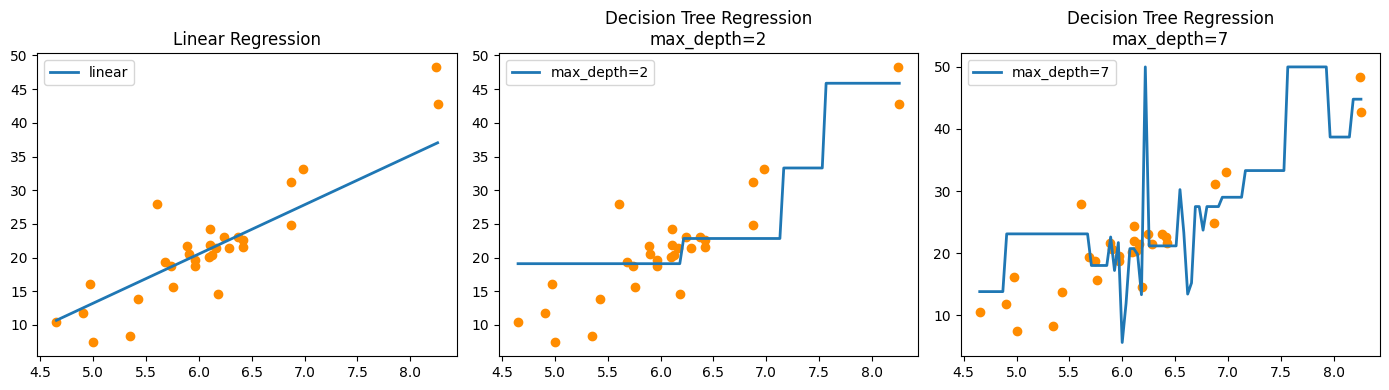

In [89]:
# [셀 5] 시각화
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# Generate predictions for the plot using a range of X_test_sample values
X_plot = np.linspace(X_test_sample.min(), X_test_sample.max(), 100).reshape(-1, 1)
pred_lr_plot = lr_reg.predict(X_plot)
pred_rf2_plot = rf_reg2.predict(X_plot)
pred_rf7_plot = rf_reg7.predict(X_plot)


# 선형 회귀
ax1.set_title("Linear Regression")
ax1.scatter(X_test_sample, y_test_sample, c="darkorange")
ax1.plot(X_plot, pred_lr_plot, label="linear", linewidth=2)
ax1.legend()

# 트리 (max_depth=2)
ax2.set_title("Decision Tree Regression\nmax_depth=2")
ax2.scatter(X_test_sample, y_test_sample, c="darkorange")
ax2.plot(X_plot, pred_rf2_plot, label="max_depth=2", linewidth=2)
ax2.legend()

# 트리 (max_depth=7)
ax3.set_title("Decision Tree Regression\nmax_depth=7")
ax3.scatter(X_test_sample, y_test_sample, c="darkorange")
ax3.plot(X_plot, pred_rf7_plot, label="max_depth=7", linewidth=2)
ax3.legend()

plt.tight_layout()
plt.show()